In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()


Saving survey lung cancer.csv to survey lung cancer.csv


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


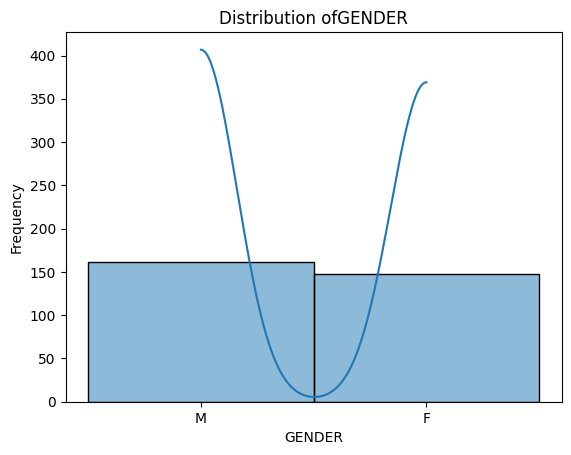

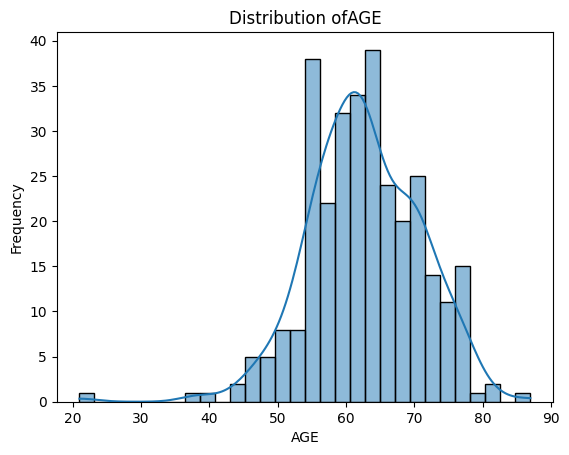

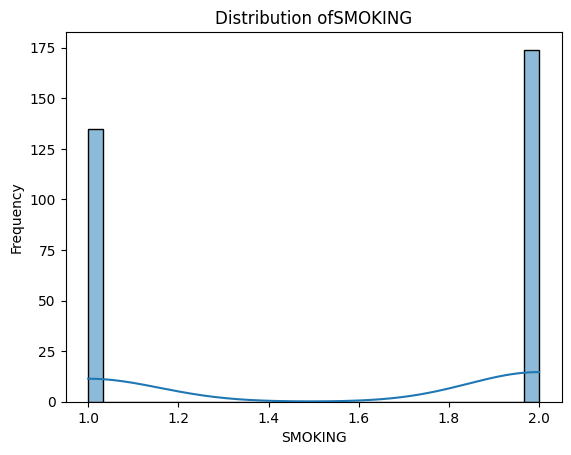

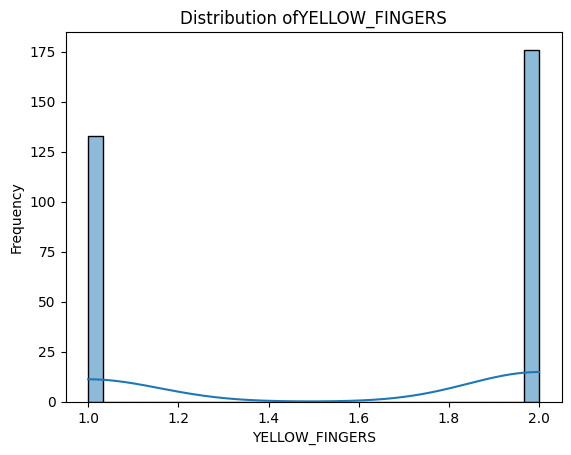

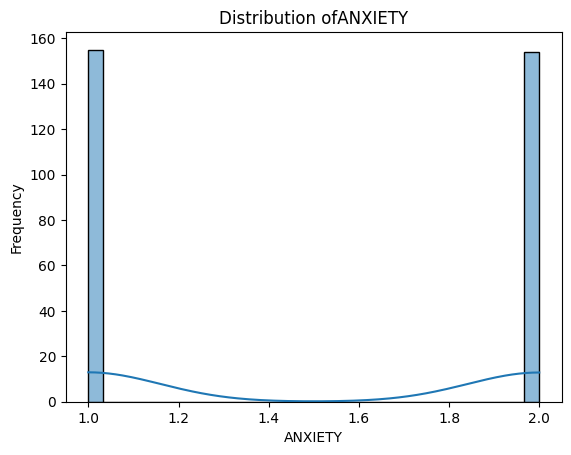

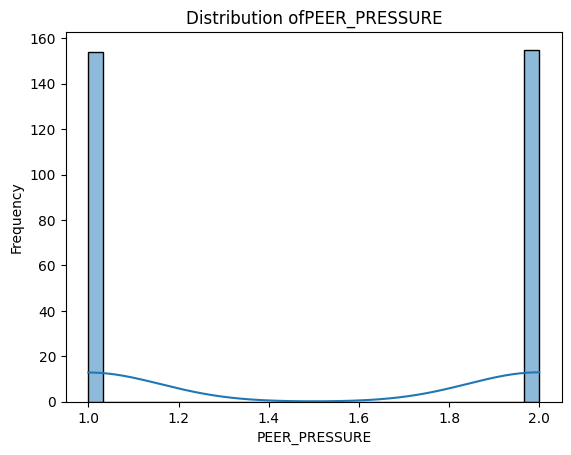

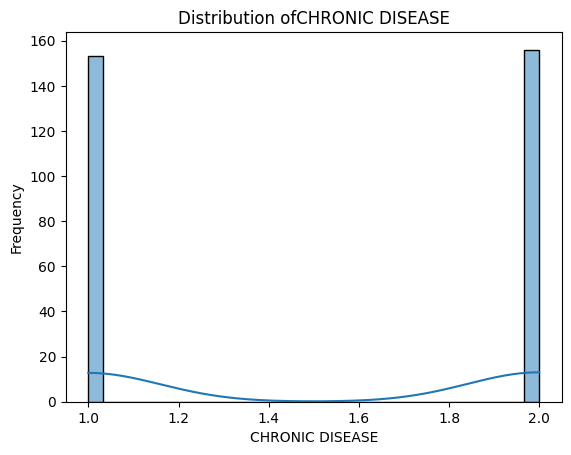

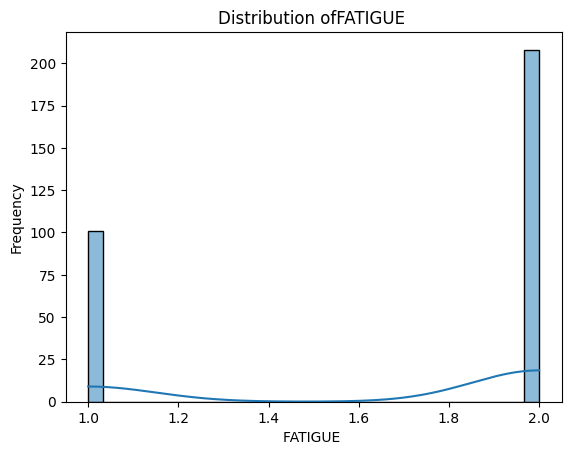

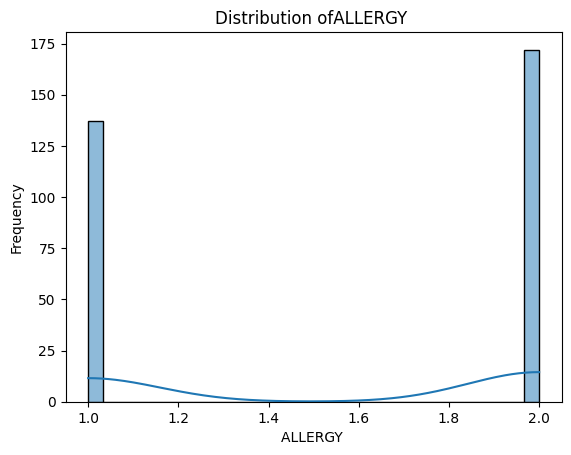

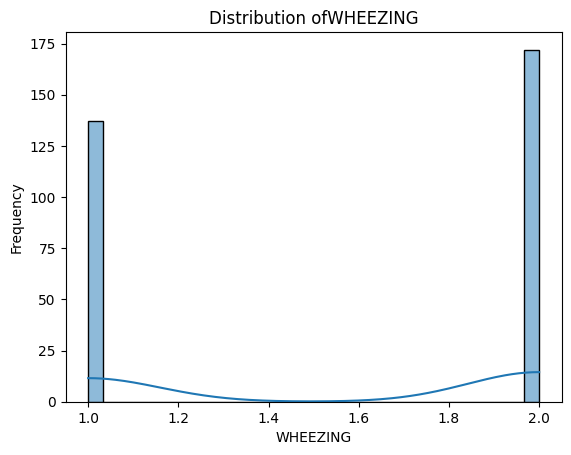

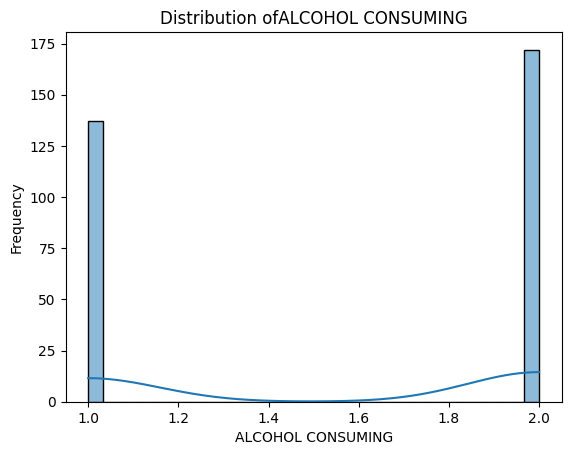

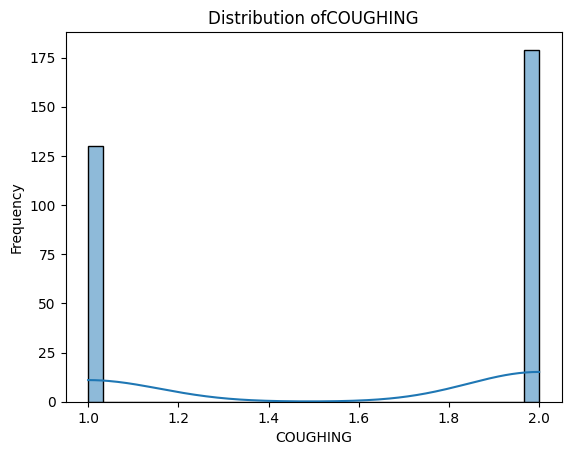

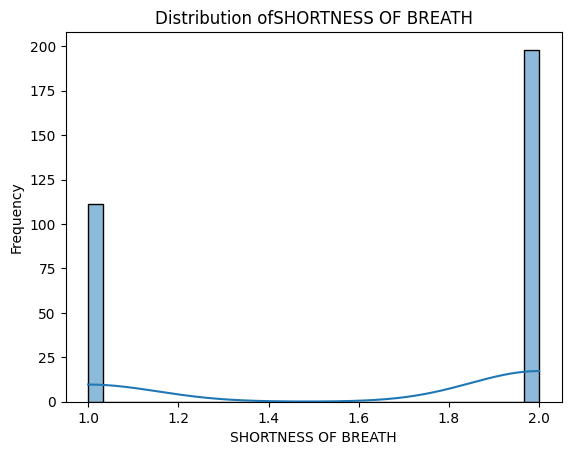

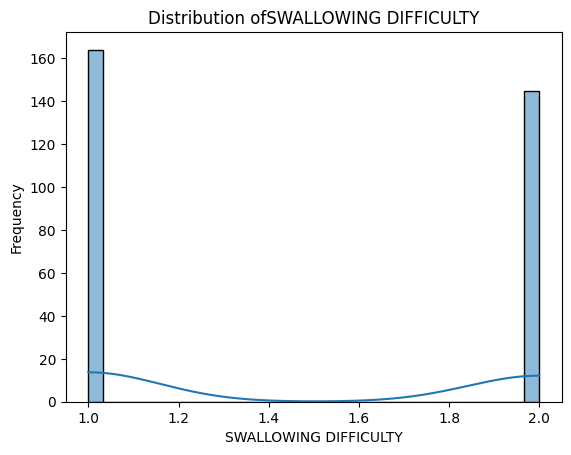

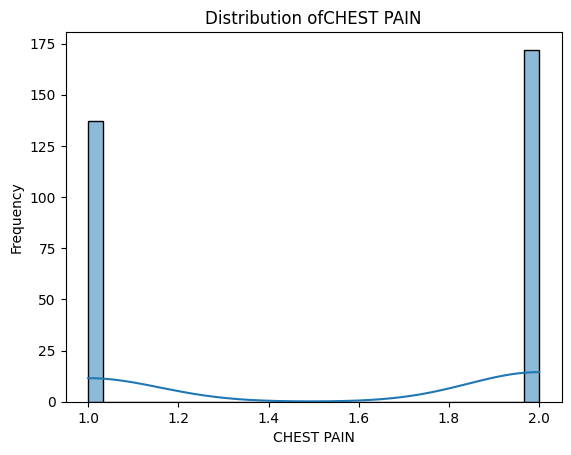

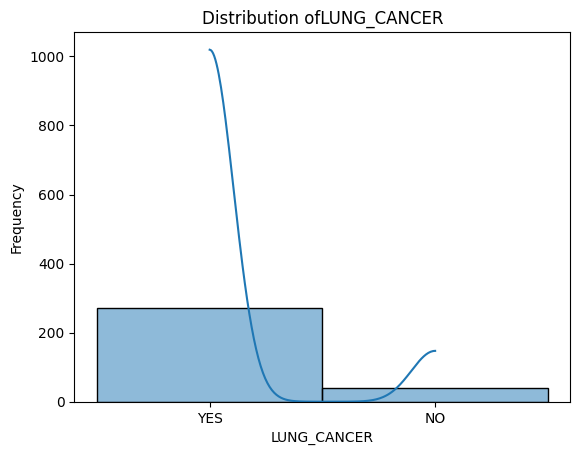

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  sns.histplot(df[column], bins=30, kde=True)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distribution of' + column)
  plt.show()


In [9]:
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

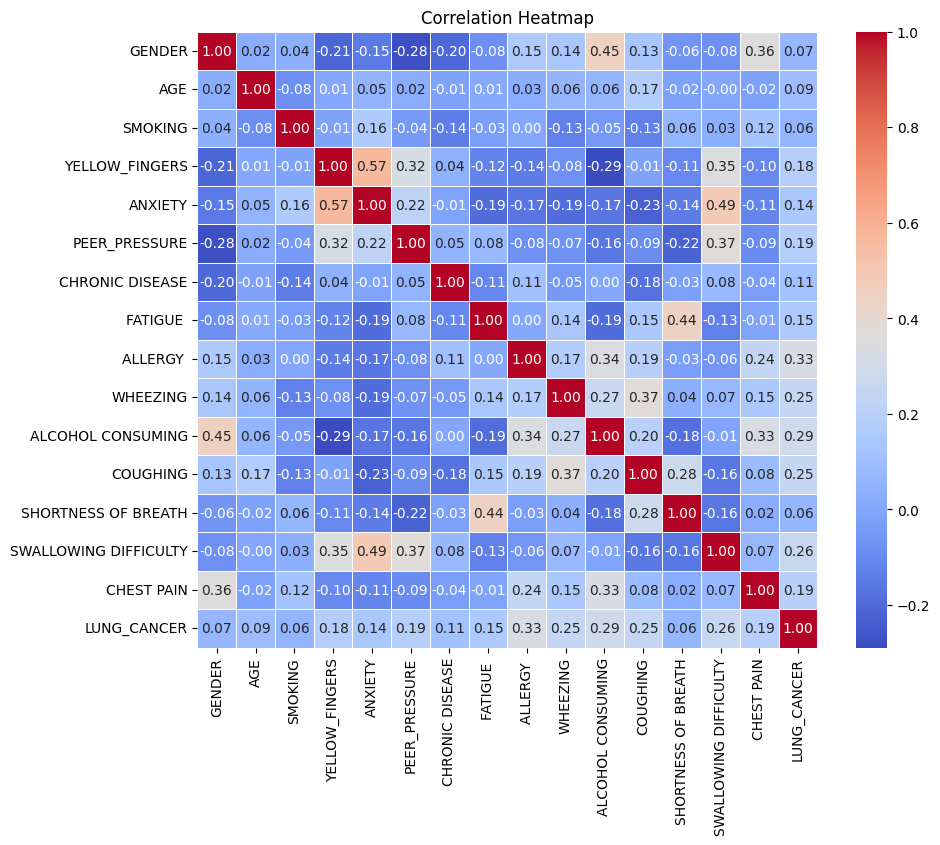

In [10]:
correlation= df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

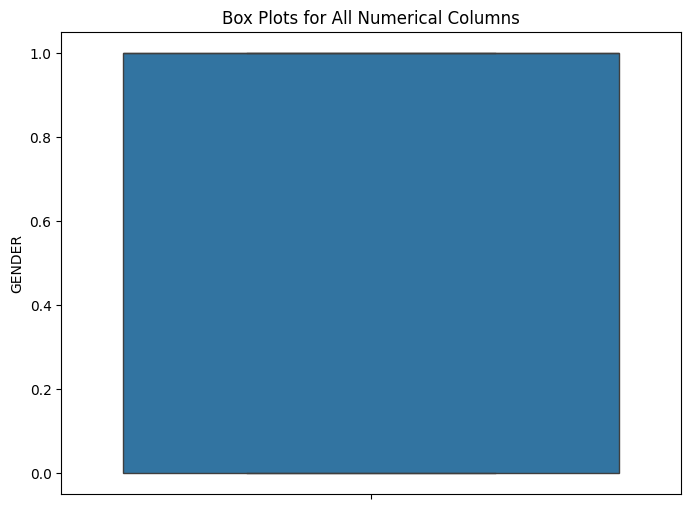

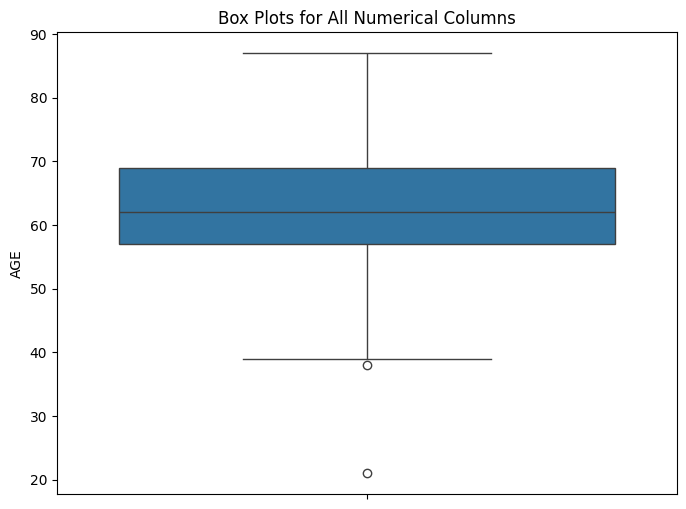

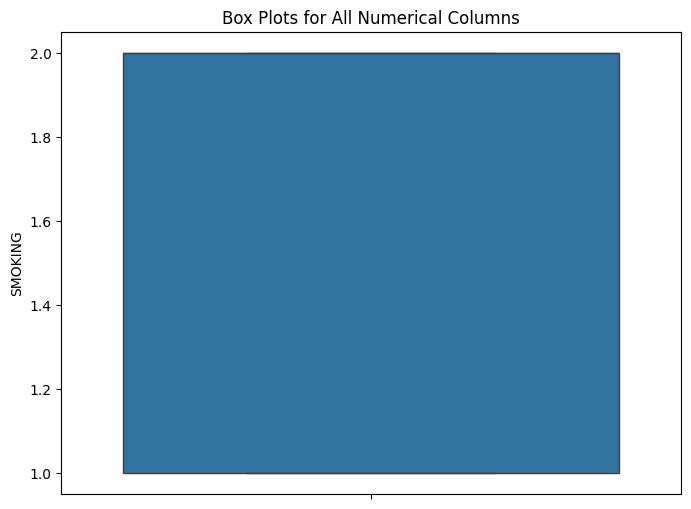

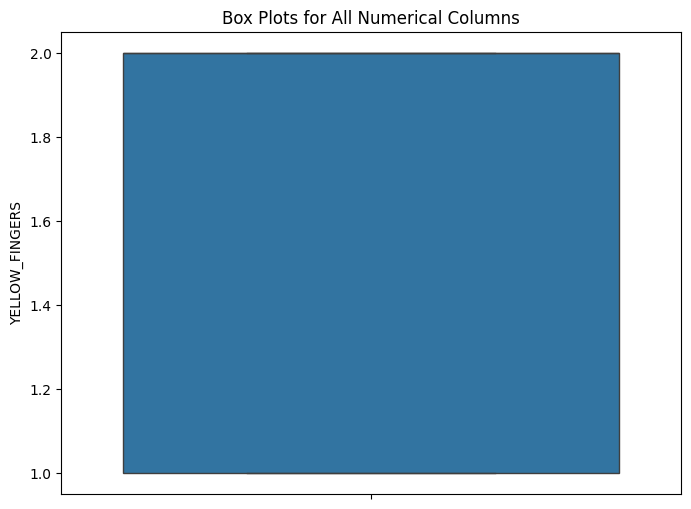

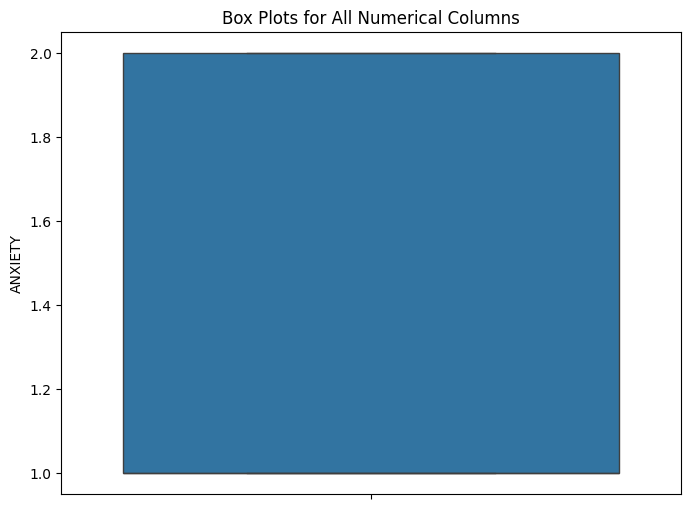

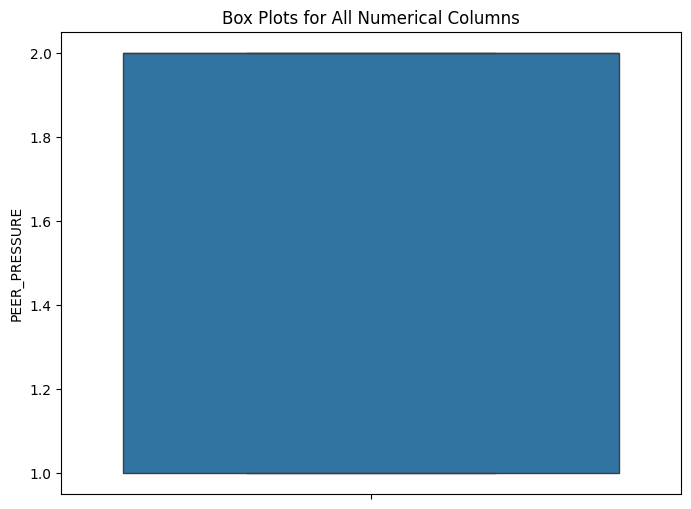

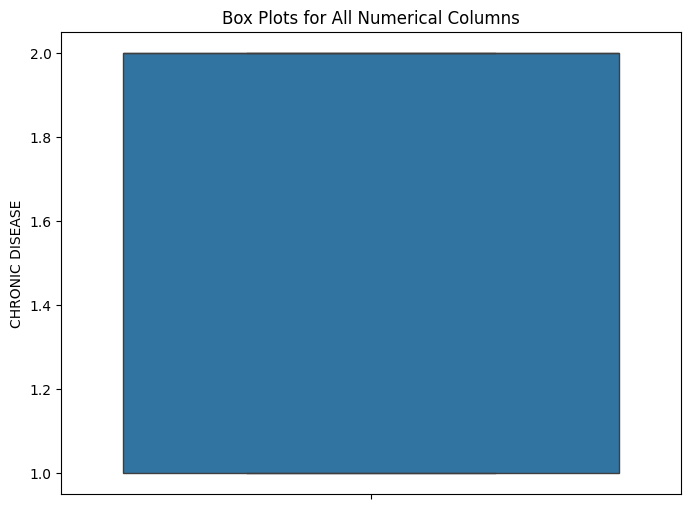

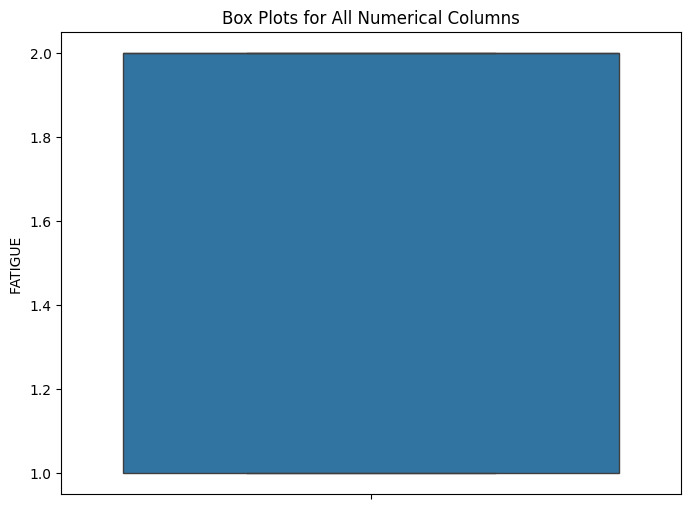

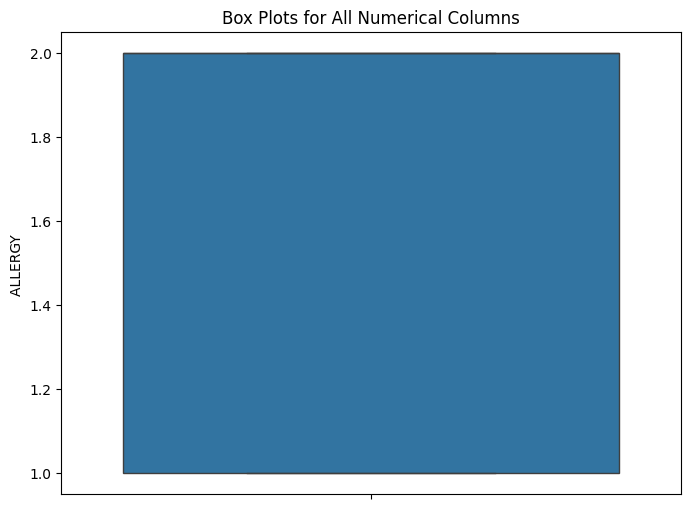

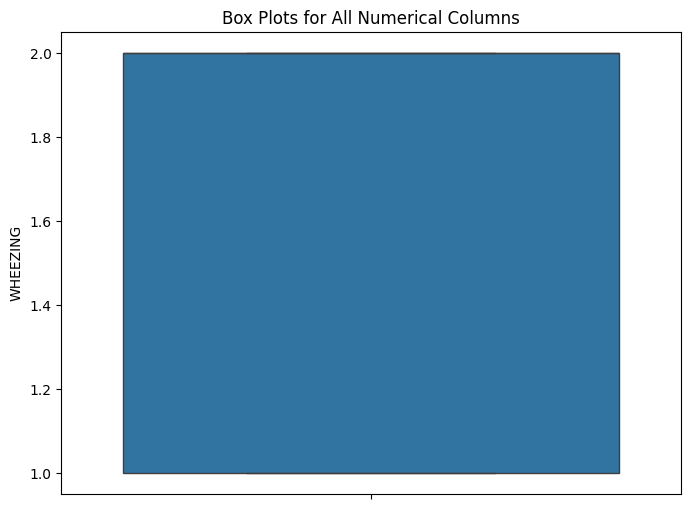

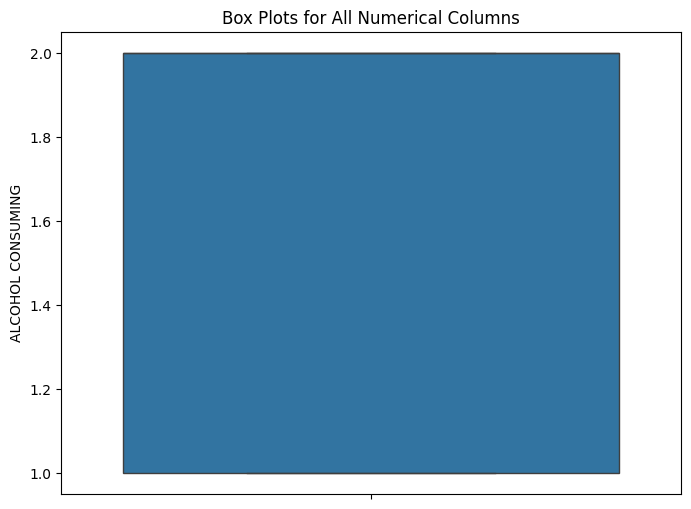

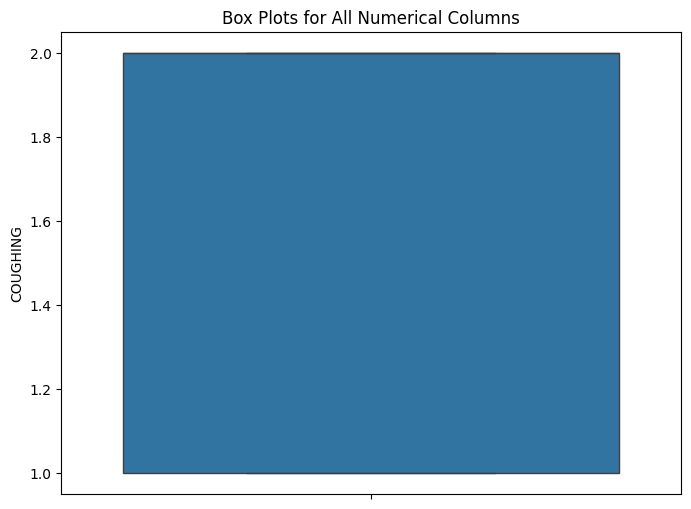

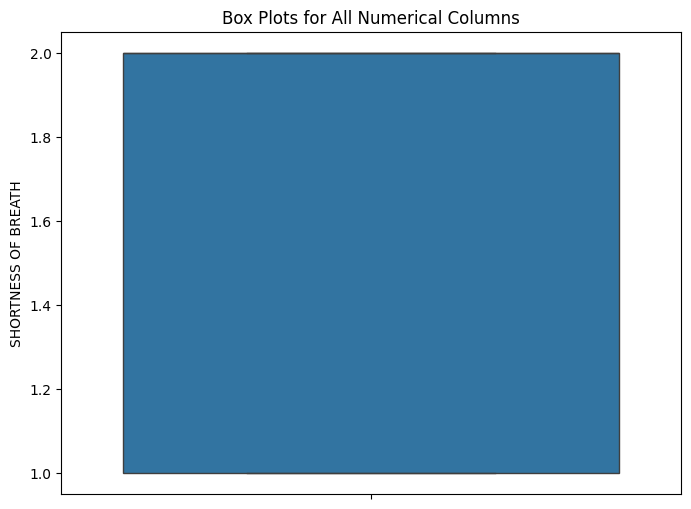

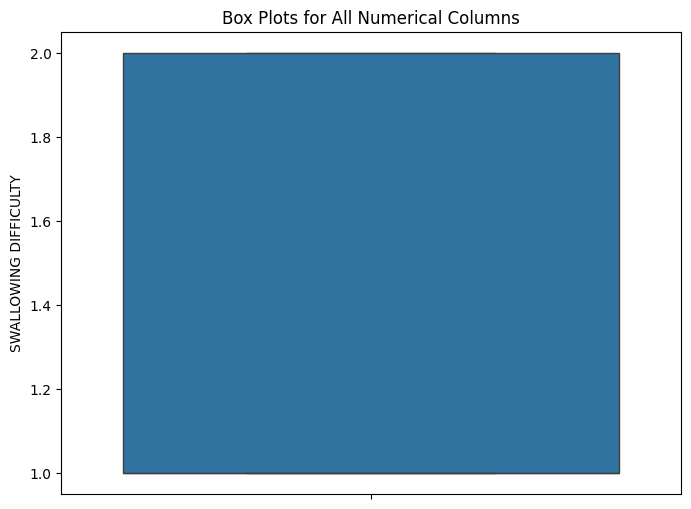

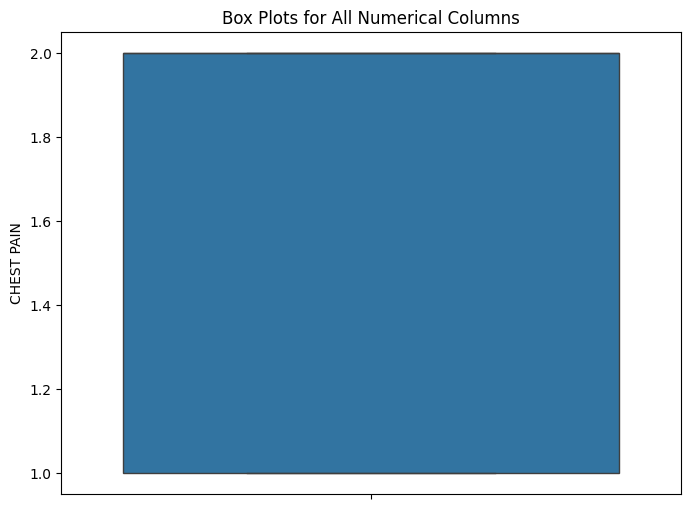

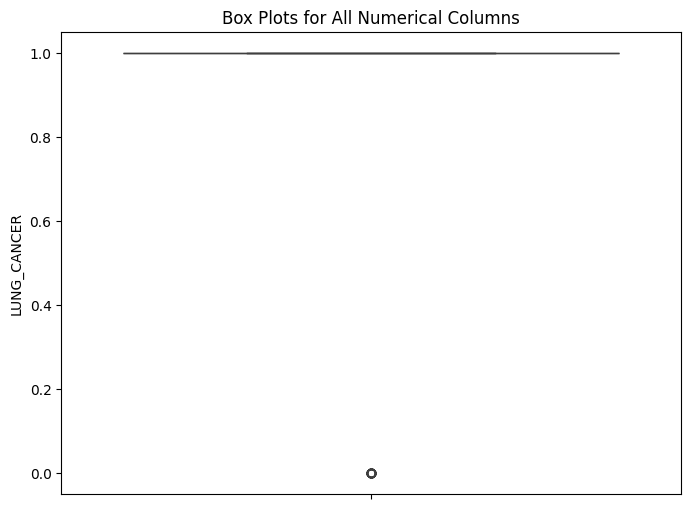

In [14]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])
  plt.title('Box Plots for All Numerical Columns')
  plt.xticks(rotation=90)
  plt.show()

In [16]:
nc_df = df[df['LUNG_CANCER'] == 0]

num_no_cancer= (df['LUNG_CANCER']==0).sum()
num_has_cancer= (df['LUNG_CANCER']==1).sum()
times = int (num_has_cancer / num_no_cancer)

for i in range(times):
  df = pd.concat([df, nc_df], ignore_index=True)

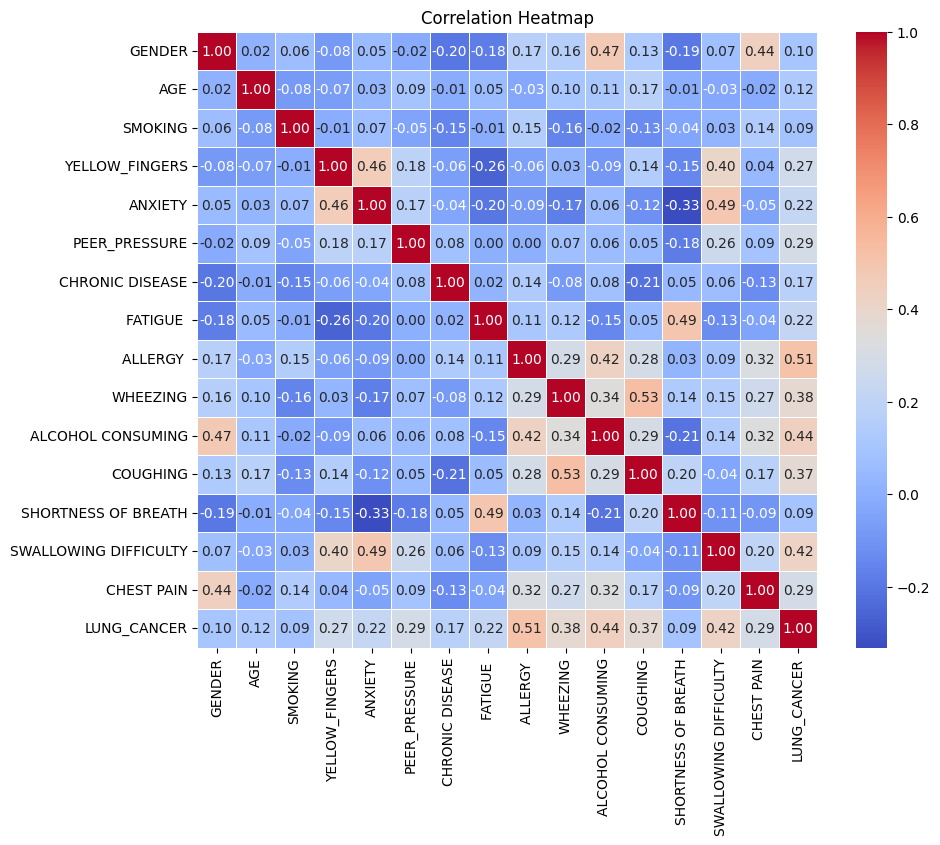

In [17]:
correlation= df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

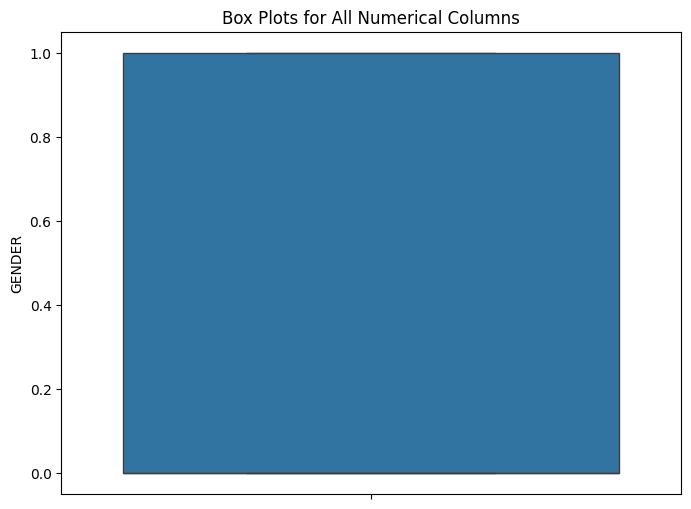

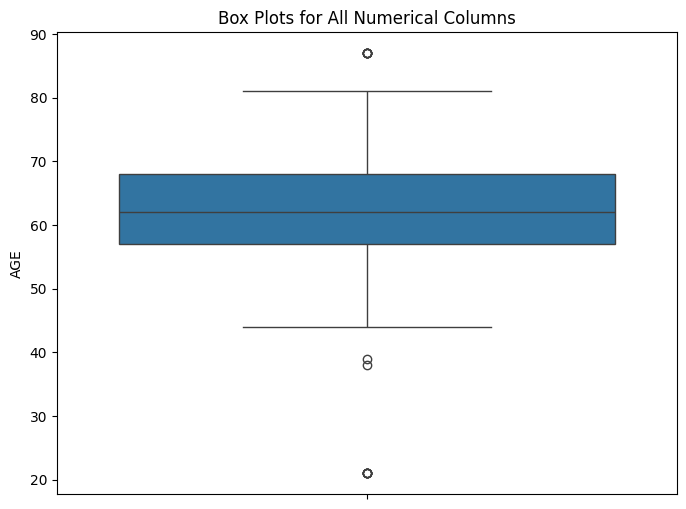

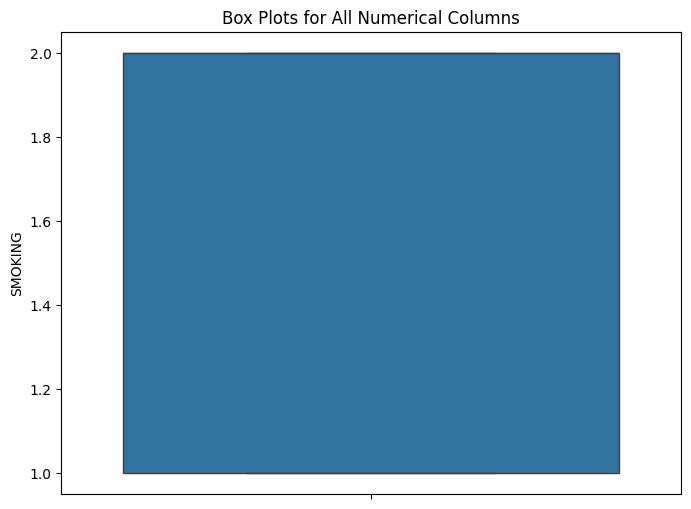

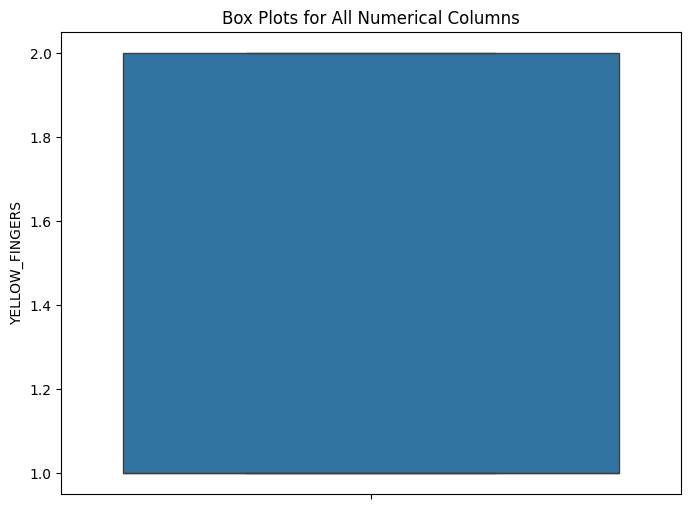

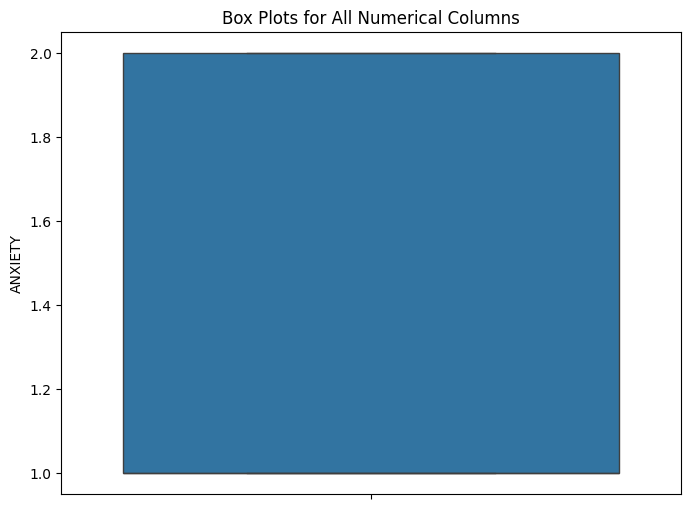

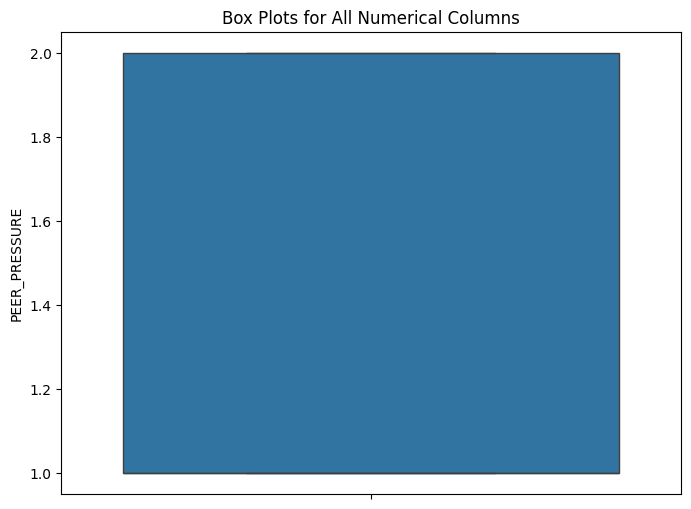

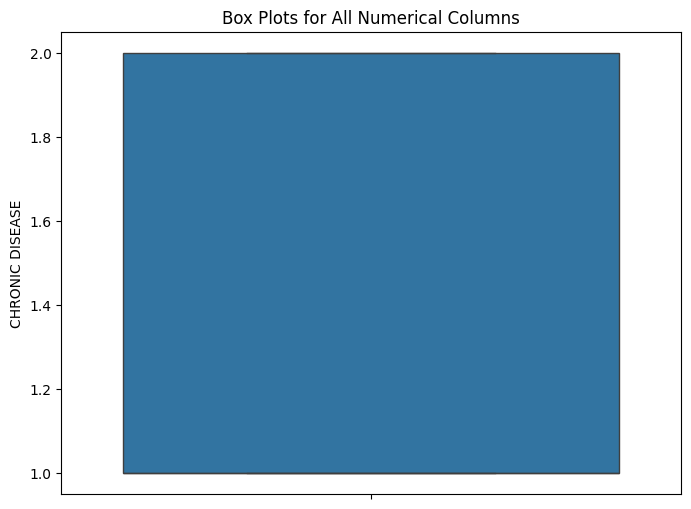

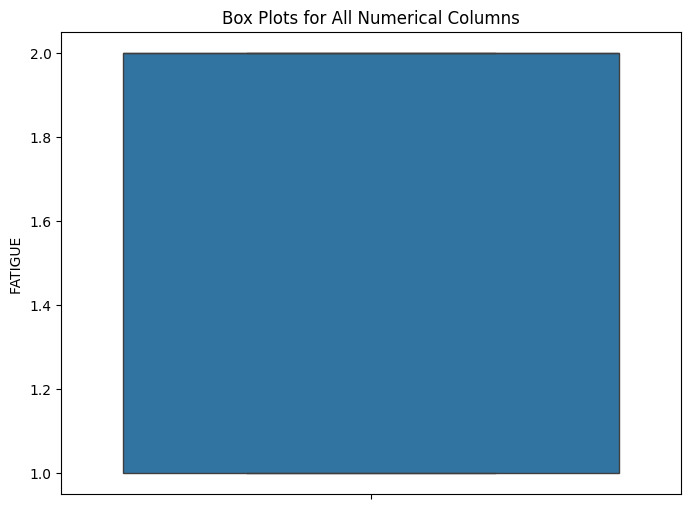

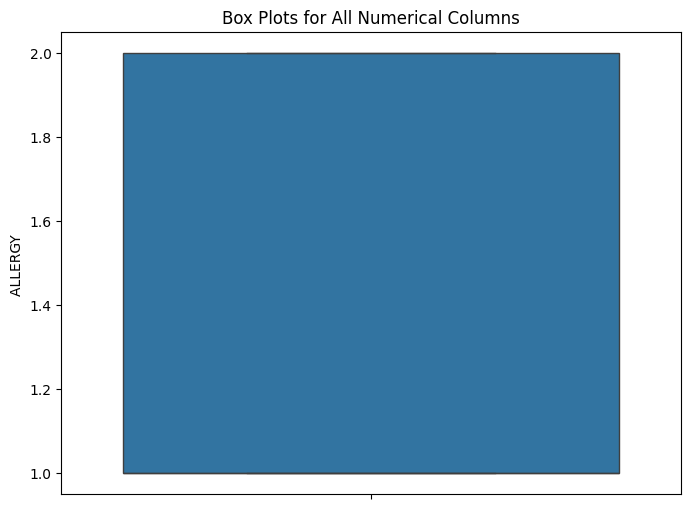

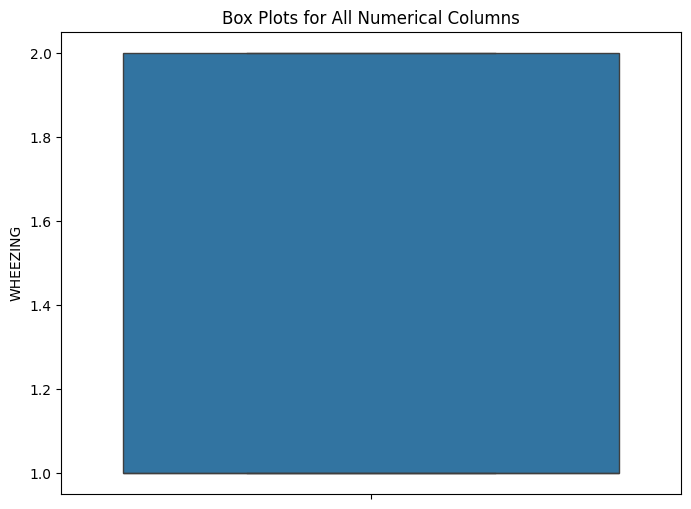

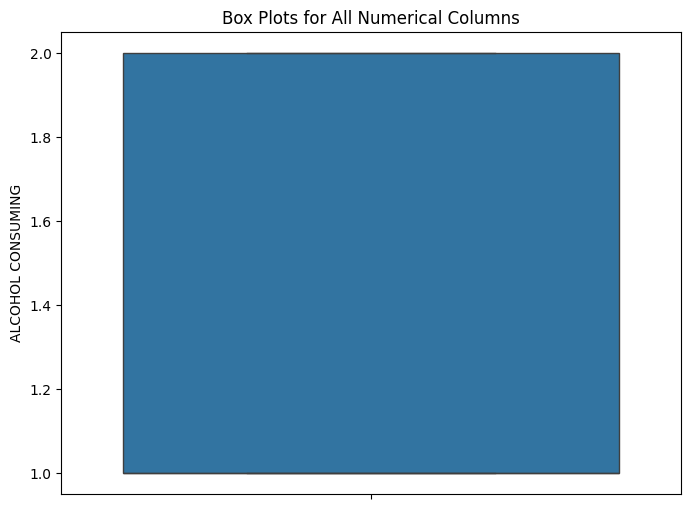

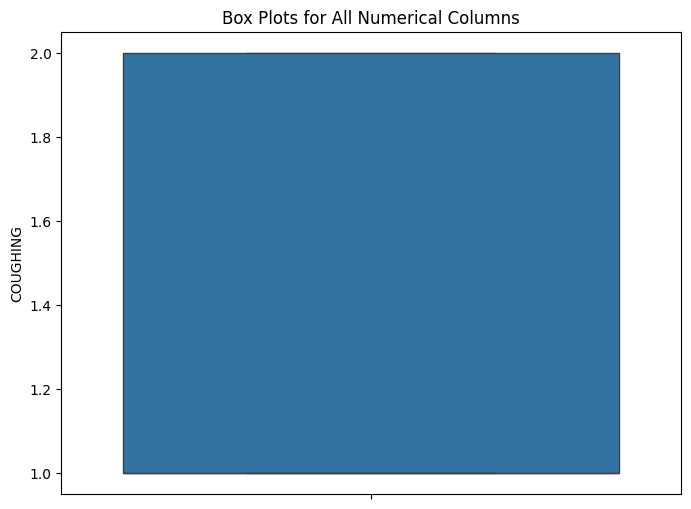

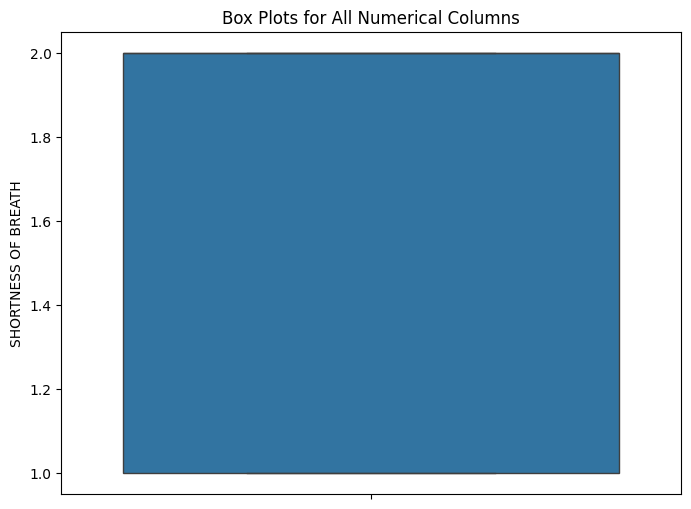

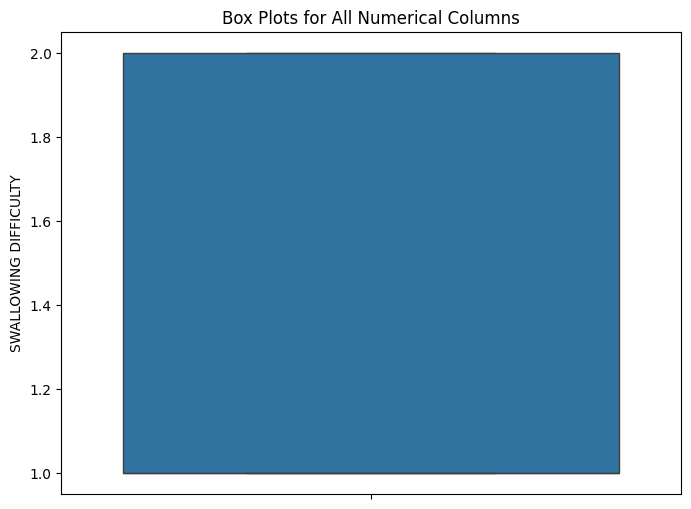

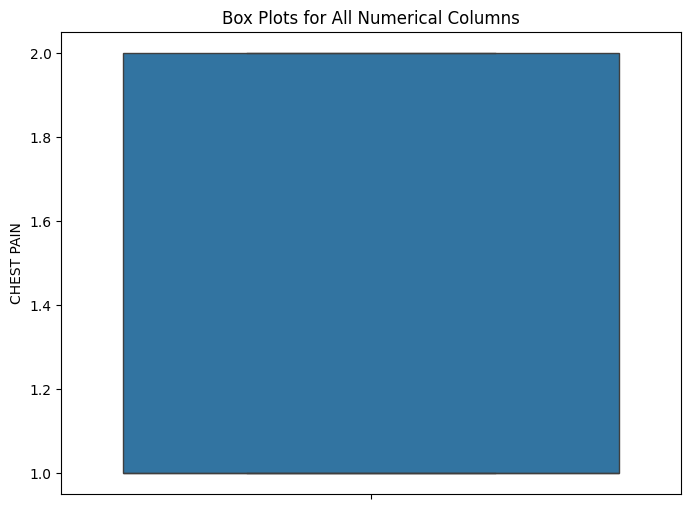

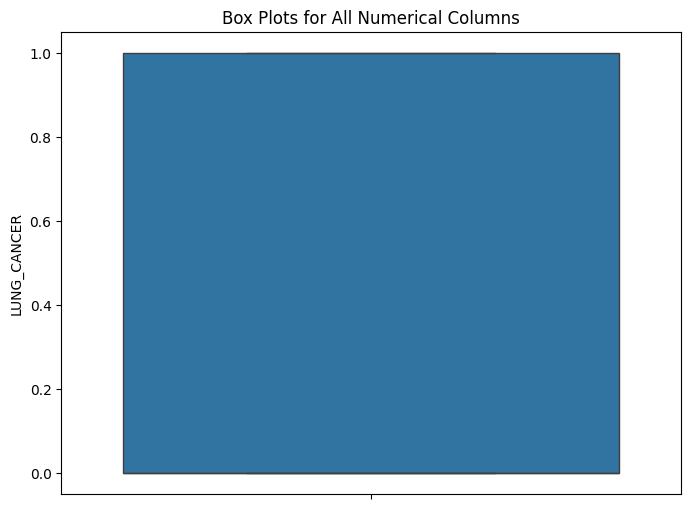

In [18]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])
  plt.title('Box Plots for All Numerical Columns')
  plt.xticks(rotation=90)
  plt.show()

# ANN training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [22]:
x = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [23]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [24]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [25]:
mlp_clf.fit(trainX_scaled, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [26]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.94


In [27]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       1.00      0.86      0.93        44

    accuracy                           0.94       109
   macro avg       0.96      0.93      0.94       109
weighted avg       0.95      0.94      0.94       109

